In [1]:
import graphviz
import subprocess

# Following step is in addition to pip install graphviz
# Had to install Graphviz executable for windows from the following path:
# https://graphviz.gitlab.io/_pages/Download/windows/graphviz-2.38.msi
# Set environment variable PATH (both user PATH and system PATH to include the installation path of graphviz)
# i.e. C:\ProgramData\Anaconda3\Library\bin\graphviz

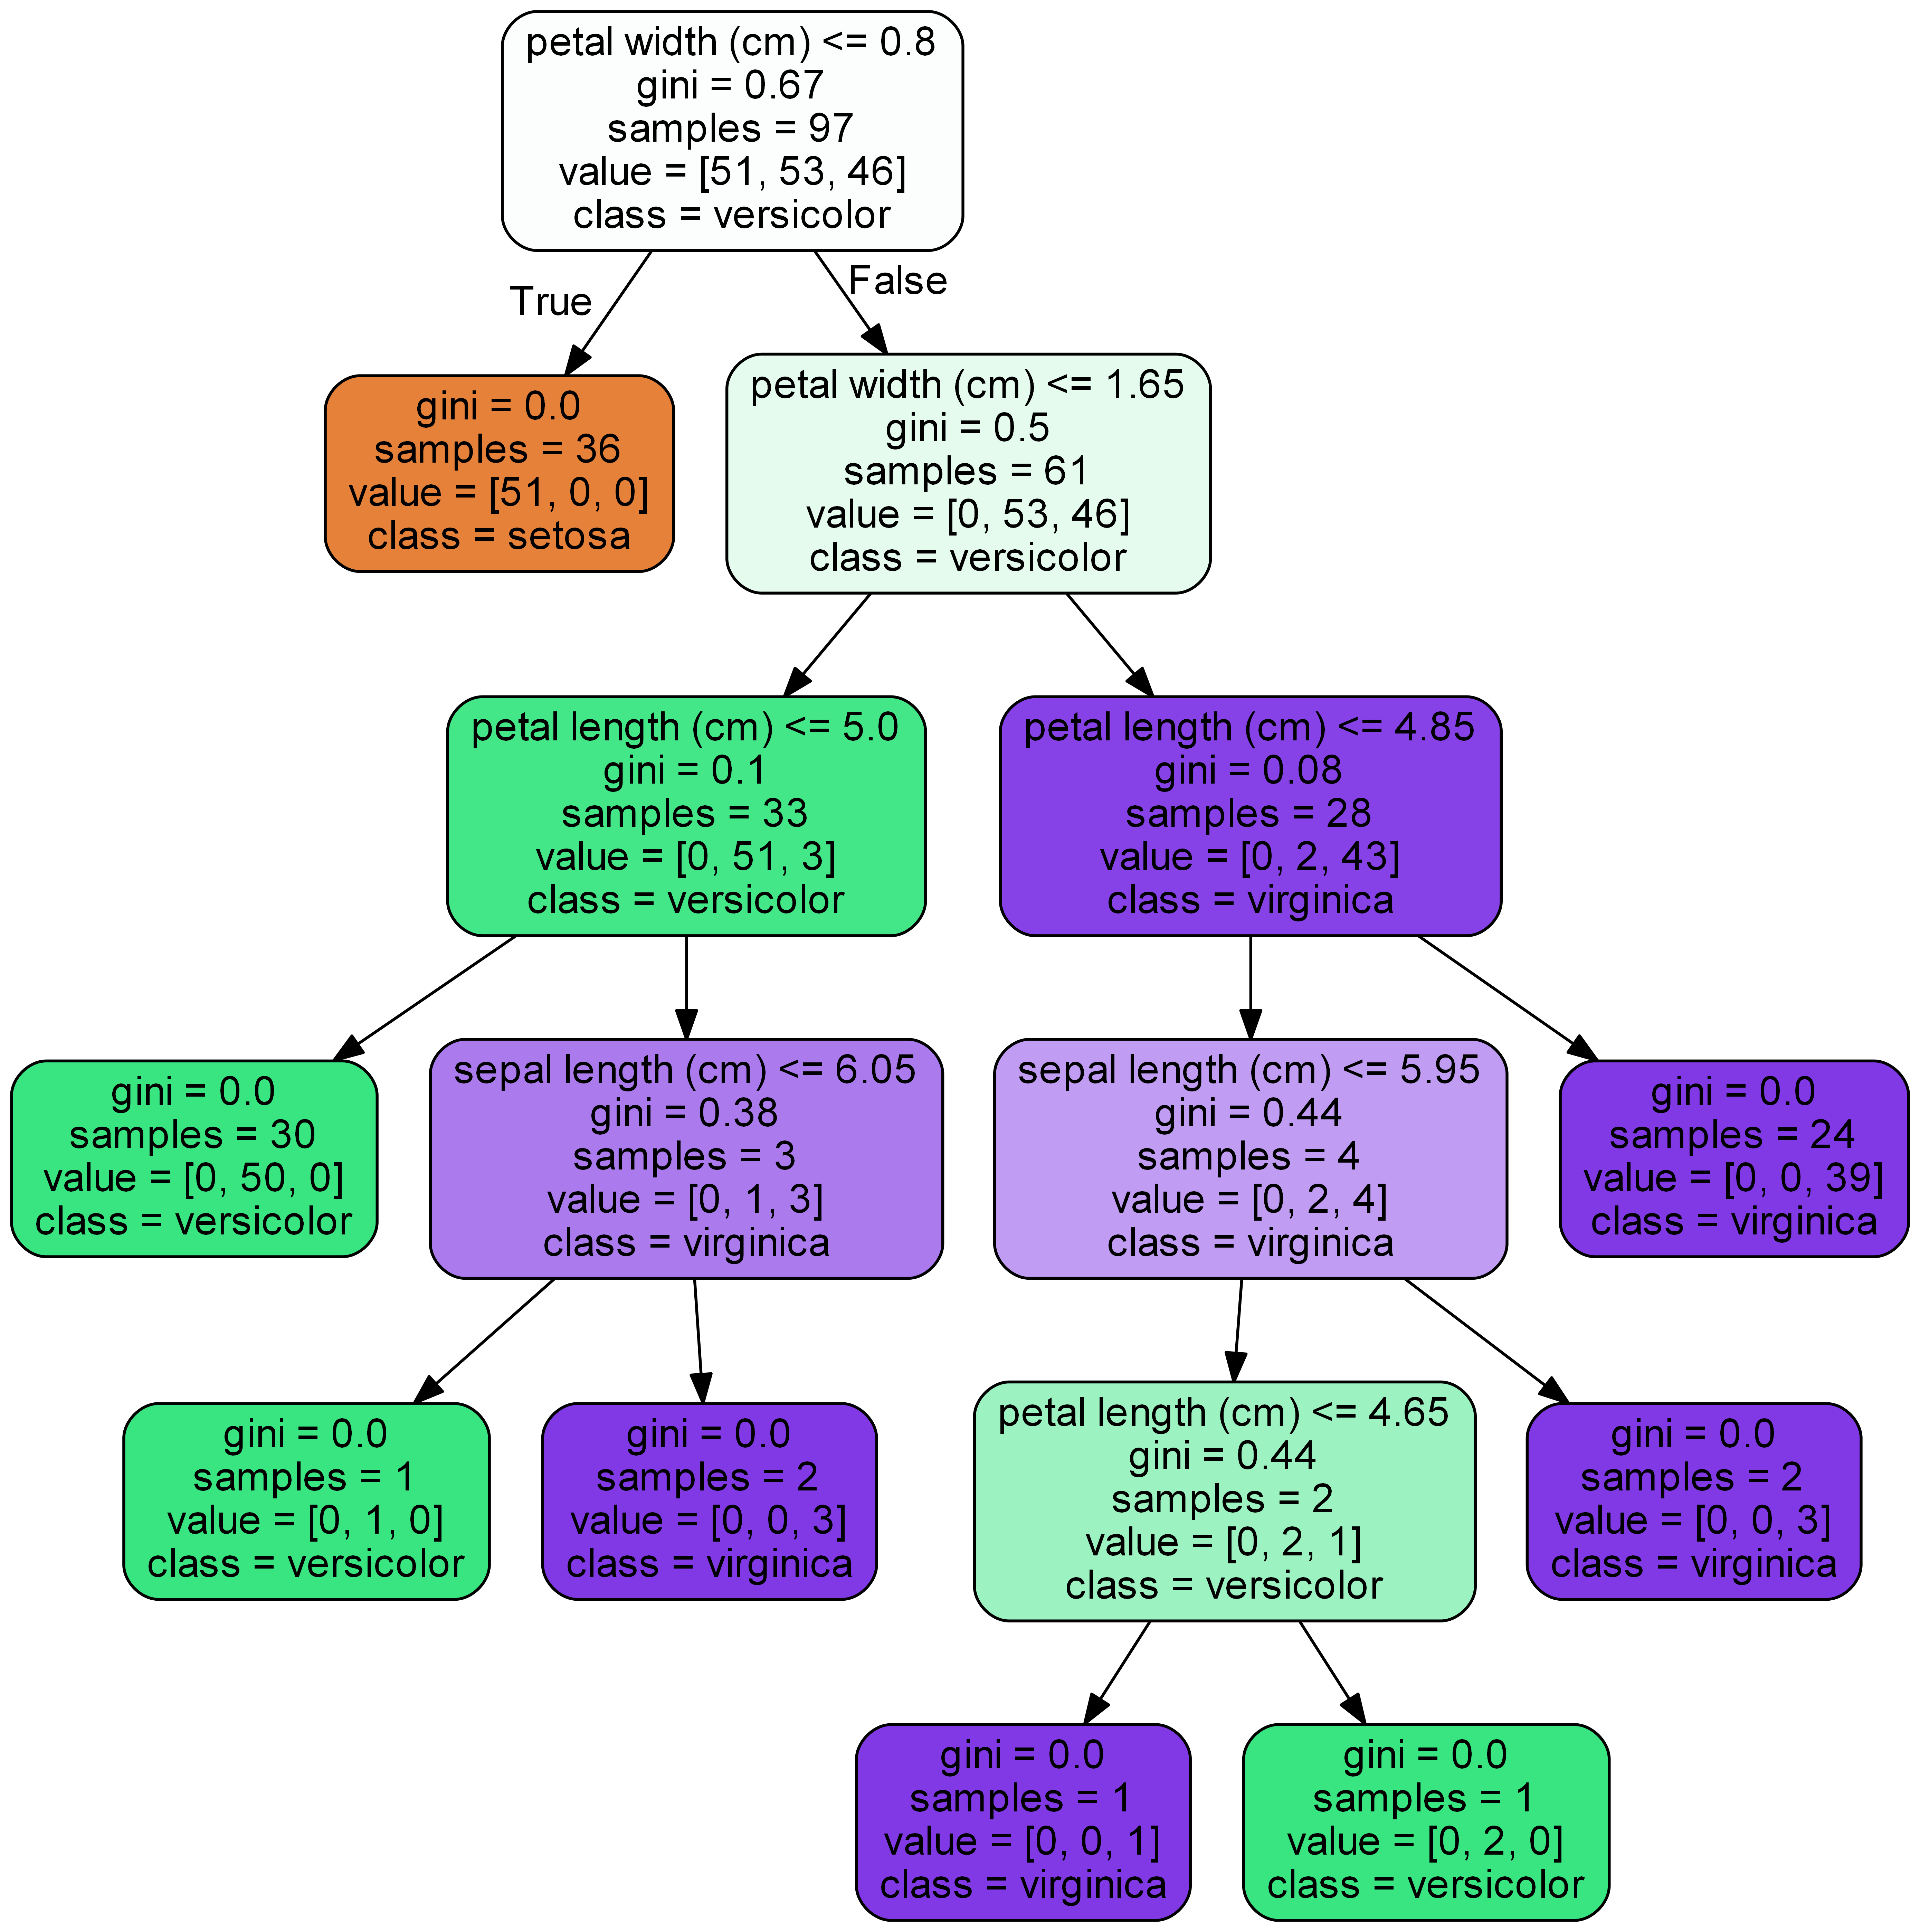

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

# Model (can also use single decision tree)
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=10)

# Train
model.fit(iris.data, iris.target)

# Extract single tree
estimator = model.estimators_[5]

from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = iris.feature_names,
                class_names = iris.target_names,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

# Another Example to produce graph in pdf document
#from graphviz import Digraph
#dot = Digraph(comment='The Round Table')

#dot.node('A', 'King Arthur')
#dot.node('B', 'Sir Bedevere the Wise')
#dot.node('L', 'Sir Lancelot the Brave')
#dot.edges(['AB', 'AL'])
#dot.edge('B', 'L', constraint='false')
#dot.render('test-output/round-table.gv', view=True)